In [2]:
pip install konlpy

In [4]:
from konlpy.tag import Okt, Komoran, Mecab, Hannanum, Kkma

In [5]:
def get_tokenizer(tokenizer_name):
  if tokenizer_name=="kommoran":
    tokenizer=Komoran()
  elif tokenizer_name=="okt":
    tokenizer=Okt()
  elif tokenizer_name=="mecab":
    tokenizer=Mecab()
  elif tokenizer_name=="hannanum":
    tokenizer=Hannanum()
  elif tokenizer_name=="kkma":
    tokenizer=Kkma()
  else:
    tokenizer=Mecab()
  return tokenizer

# **01. Okt**

트위터에서 개발하여 오픈한 한국어 형태소 분석기. 사용법이 쉽고 성능이 빠르다고 한다.

In [6]:
tokenizer=get_tokenizer("okt")
tokenizer.morphs("아버지가방에들어가신다")
tokenizer.pos("아버지가방에들어가신다")

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]

# **02. komoran**

- 오탈자, 띄어쓰기 등에 강하며 음절이 아닌 자소 단위의 분석을 진행한다.
- 자소 분리나 오탈자에 대해서도 품질이 보장되어야 한다면 코모란 사용을 고려하는 것이 좋다.

[품사표](http://docs.komoran.kr/firststep/postypes.html#pos-table)

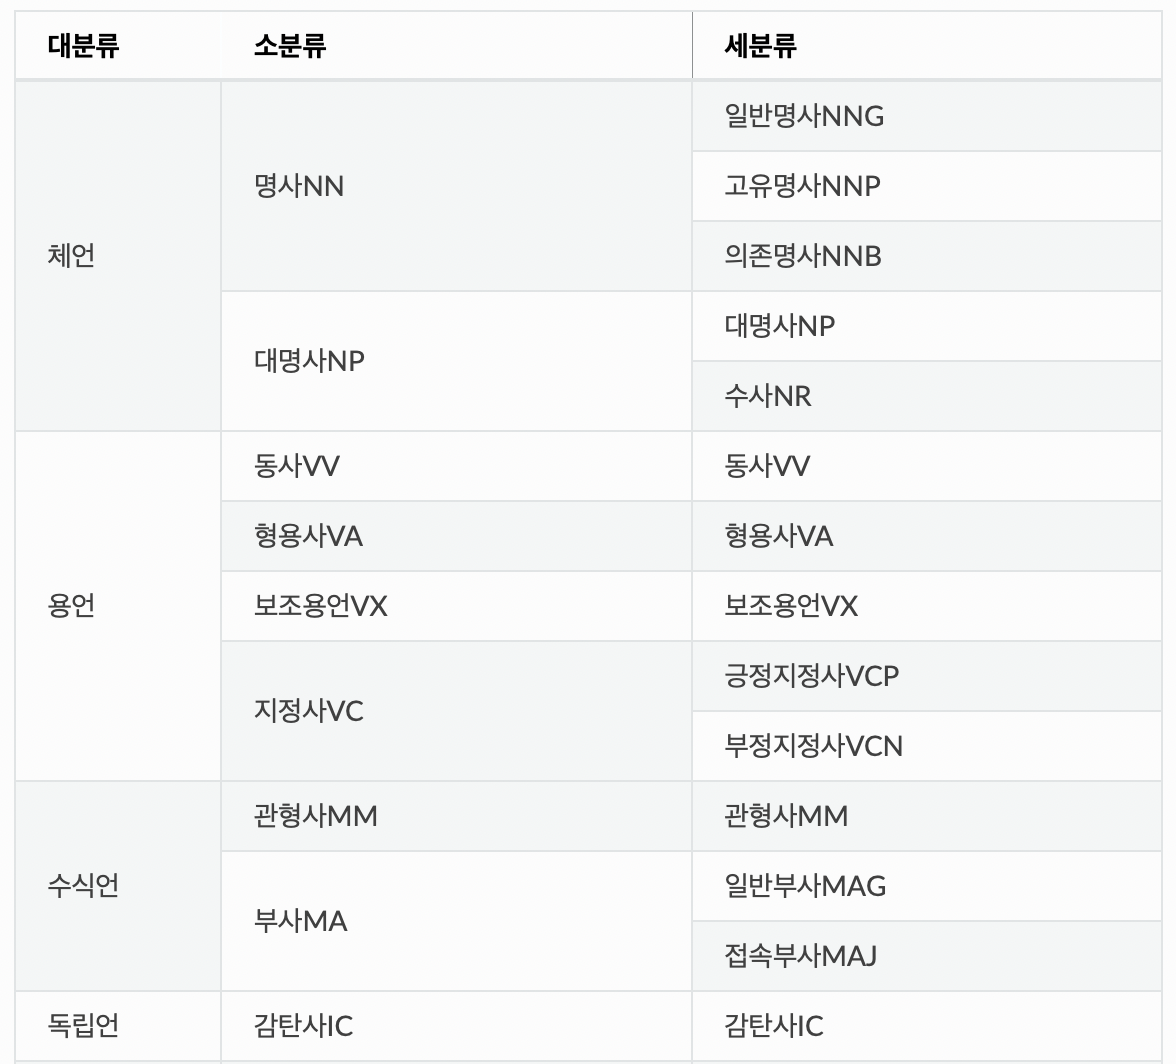


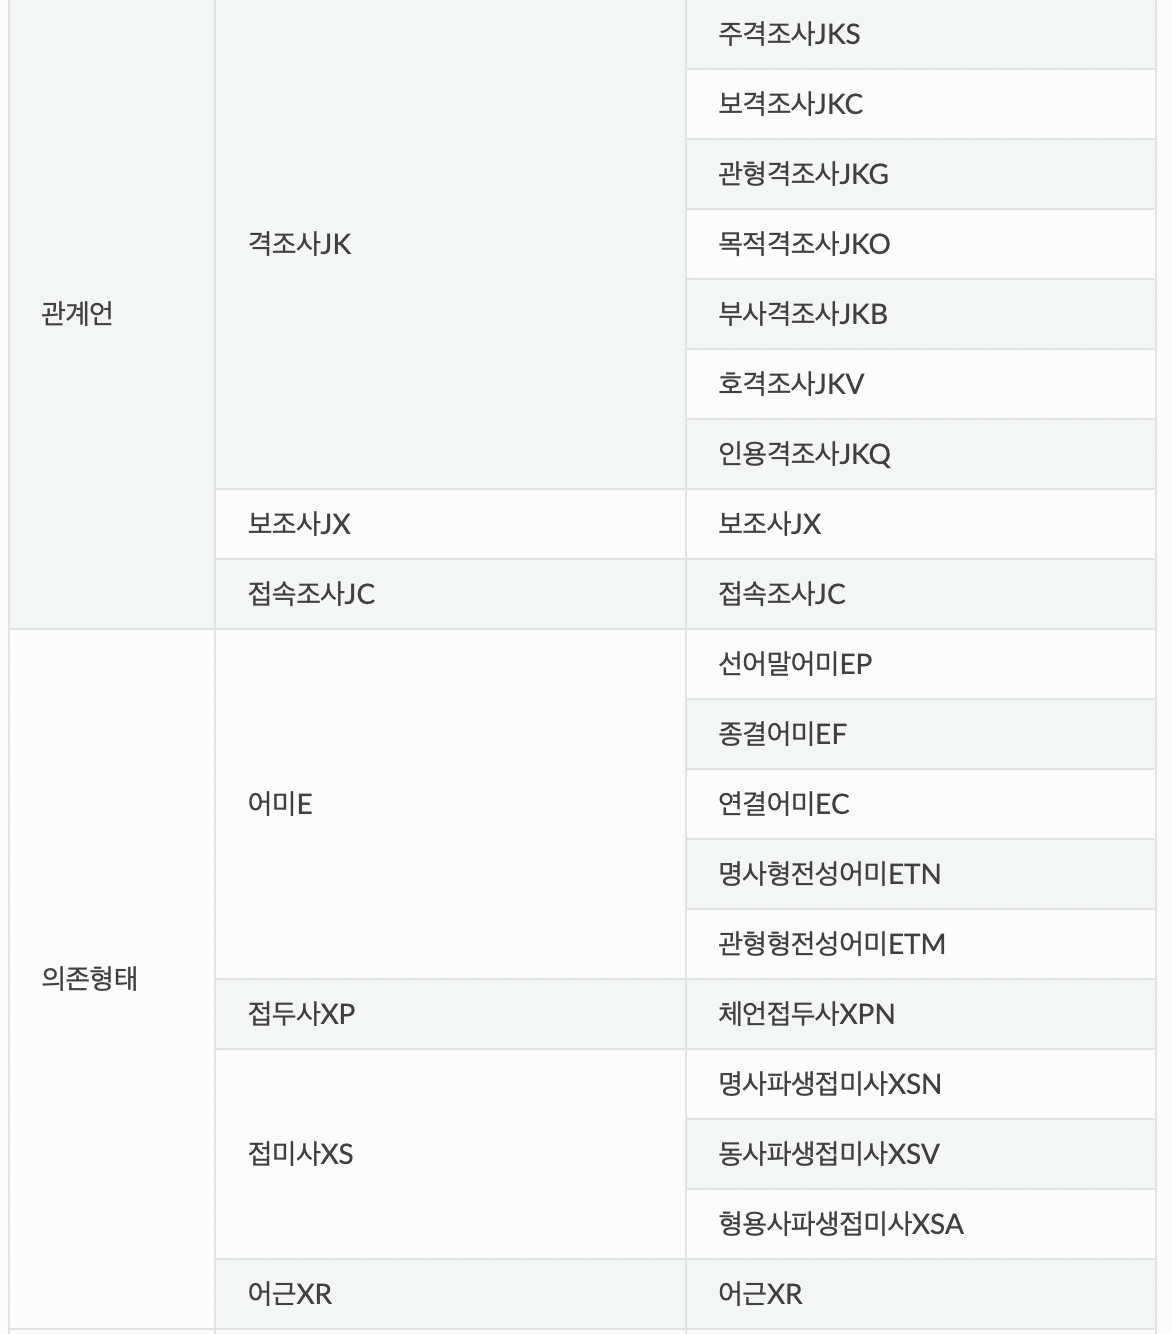

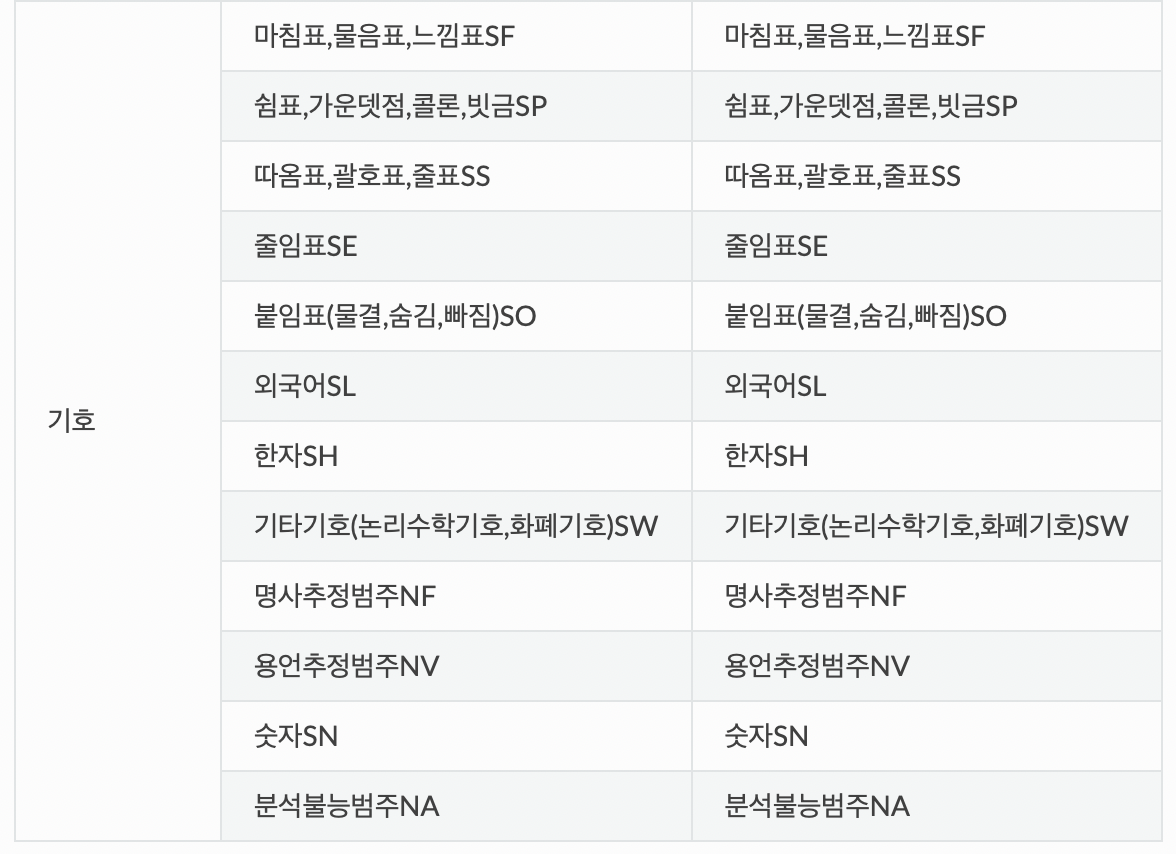

In [10]:
tokenizer=get_tokenizer("kommoran")
print(tokenizer.morphs("아버지가방에들어가신다"))
print(tokenizer.pos("아버지가방에들어가신다"))

['아버지', '가방', '에', '들어가', '시', 'ㄴ다']
[('아버지', 'NNG'), ('가방', 'NNP'), ('에', 'JKB'), ('들어가', 'VV'), ('시', 'EP'), ('ㄴ다', 'EC')]


In [15]:
tokenizer=get_tokenizer("kommoran")
print(tokenizer.morphs("아버지가 방에 들어가신다"))
print(tokenizer.pos("아버지가 방에 들어가신다"))

['아버지', '가', '방', '에', '들어가', '시', 'ㄴ다']
[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKB'), ('들어가', 'VV'), ('시', 'EP'), ('ㄴ다', 'EC')]


# **03. hannanum**

카이스트 연구실에서 연구/개발. 띄어쓰기 처리에 약점이 있다.

In [12]:
tokenizer=get_tokenizer("hannanum")
print(tokenizer.morphs("아버지가방에들어가신다"))
print(tokenizer.pos("아버지가방에들어가신다"))

['아버지가방에들어가', '이', '시ㄴ다']
[('아버지가방에들어가', 'N'), ('이', 'J'), ('시ㄴ다', 'E')]


In [14]:
tokenizer=get_tokenizer("hannanum")
print(tokenizer.morphs("아버지가 방에 들어가신다"))
print(tokenizer.pos("아버지가 방에 들어가신다"))

['아버지', '가', '방', '에', '들', '어', '가', '시ㄴ다']
[('아버지', 'N'), ('가', 'J'), ('방', 'N'), ('에', 'J'), ('들', 'P'), ('어', 'E'), ('가', 'P'), ('시ㄴ다', 'E')]


# **04. kkma**

서울대학교 연구실에서 연구/개발. 성능이 상대적으로 느림

In [16]:
tokenizer=get_tokenizer("kkma")
print(tokenizer.morphs("아버지가방에들어가신다"))
print(tokenizer.pos("아버지가방에들어가신다"))

[('아버지', 'NNG'),
 ('가방', 'NNG'),
 ('에', 'JKM'),
 ('들어가', 'VV'),
 ('시', 'EPH'),
 ('ㄴ다', 'EFN')]

# **05. Khaiii**

- Kakao Hangul Analyzer. CNN을 이용한 자연어 처리 알고리즘 적용
- GPU 없이도 형태소 분석이 가능하며 실행 속도 역시 빠르다고 한다

In [17]:
!git clone https://github.com/kakao/khaiii.git

Cloning into 'khaiii'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 1000 (delta 38), reused 61 (delta 22), pack-reused 877
Receiving objects: 100% (1000/1000), 33.06 MiB | 16.35 MiB/s, done.
Resolving deltas: 100% (396/396), done.


In [18]:
!pip install cmake

In [19]:
!mkdir build

In [20]:
!cd build && cmake /content/khaiii

-- [hunter] Initializing Hunter workspace (70287b1ffa810ee4e952052a9adff9b4856d0d54)
-- [hunter]   https://github.com/ruslo/hunter/archive/v0.23.34.tar.gz
-- [hunter]   -> /root/.hunter/_Base/Download/Hunter/0.23.34/70287b1
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Performing Test fma_compiles
-- Performing Test fma_compiles - Success
-- Performing Test fma_runs
-- Performing Test fma_runs - Success
-- [khaiii] fused multiply add option enab

In [21]:
!cd /content/build/ && make all

Scanning dependencies of target obj_khaiii
[  3%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/Config.cpp.o
[  7%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/Embed.cpp.o
[ 11%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/ErrPatch.cpp.o
[ 15%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/KhaiiiImpl.cpp.o
[ 19%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/Morph.cpp.o
[ 23%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/Preanal.cpp.o
[ 26%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/Resource.cpp.o
[ 30%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/Restore.cpp.o
[ 34%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/Sentence.cpp.o
[ 38%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/Tagger.cpp.o
[ 42%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/Trie.cpp.o
[ 4

In [22]:
!cd /content/build/ && make resource

Scanning dependencies of target resource
INFO:root:config: {
    "cutoff": 1,
    "embed_dim": 35,
    "hidden_dim": 320,
    "model_id": "munjong.cut1.win4.sdo0.1.emb35.lr0.001.lrd0.9.bs500",
    "rsc_src": "../rsc/src",
    "window": 4
}
INFO:root:vocab.in: 5621 entries, 0 cutoff
INFO:root:vocab.out: 500 entries, 0 cutoff
INFO:root:restore.dic: 4303 entries
INFO:root:preanal.manual
INFO:root:preanal.auto
INFO:root:trie saved: /content/build/share/khaiii/preanal.tri
INFO:root:total nodes: 120812
INFO:root:expected size: 1932992
INFO:root:value saved: /content/build/share/khaiii/preanal.val
INFO:root:total entries: 83373
INFO:root:expected size: 593730
INFO:root:restore.key: 17212
INFO:root:restore.val: 68848
INFO:root:restore.one: 503
INFO:root:base.errpatch.auto
INFO:root:base.errpatch.manual
INFO:root:trie saved: /content/build/share/khaiii/errpatch.tri
INFO:root:total nodes: 2067
INFO:root:expected size: 33072
INFO:root:length saved: /content/build/share/khaiii/errpatch.len
INFO:ro

In [23]:
!cd /content/build && make install

[ 65%] Built target obj_khaiii
[ 69%] Built target khaiii
[ 76%] Built target bin_khaiii
[100%] Built target test_khaiii
Install the project...
-- Install configuration: ""
-- Installing: /usr/local/include/khaiii
-- Installing: /usr/local/include/khaiii/khaiii_api.h
-- Installing: /usr/local/include/khaiii/KhaiiiApi.hpp
-- Installing: /usr/local/include/khaiii/khaiii_dev.h
-- Installing: /usr/local/share/khaiii
-- Installing: /usr/local/share/khaiii/restore.one
-- Installing: /usr/local/share/khaiii/preanal.tri
-- Installing: /usr/local/share/khaiii/embed.bin
-- Installing: /usr/local/share/khaiii/preanal.val
-- Installing: /usr/local/share/khaiii/conv.4.fil
-- Installing: /usr/local/share/khaiii/conv.5.fil
-- Installing: /usr/local/share/khaiii/config.json
-- Installing: /usr/local/share/khaiii/restore.key
-- Installing: /usr/local/share/khaiii/errpatch.tri
-- Installing: /usr/local/share/khaiii/hdn2tag.lin
-- Installing: /usr/local/share/khaiii/restore.val
-- Installing: /usr/local/

In [24]:
!cd /content/build && make package_python

Scanning dependencies of target package_python
Run CPack packaging tool for source...
CPack: Create package using ZIP
CPack: Install projects
CPack: - Install directory: /content/khaiii
CPack: Create package
CPack: - package: /content/build/khaiii-0.4.zip generated.
Built target package_python


In [25]:
!pip install /content/build/package_python

Processing ./build/package_python
  Created wheel for khaiii: filename=khaiii-0.4-cp37-none-any.whl size=22882706 sha256=08fef478f7cd7d16e1b0f8980778b9cc09b3c5036e1fe3158cf0fbe993451ec1
  Stored in directory: /tmp/pip-ephem-wheel-cache-8plef3cs/wheels/6b/4d/23/84c4acc3ef5226ca75c4e3ad84c39a0654d11c3a9c1941193f
Successfully built khaiii


In [26]:
from khaiii import KhaiiiApi
tokenizer=KhaiiiApi()

In [27]:
data=tokenizer.analyze("아버지가방에들어가신다")
tokens=[]
for word in data:
  tokens.extend([str(m).split("/")[0] for m in word.morphs])

In [28]:
tokens

['아버지', '가', '방', '에', '들어가', '시', 'ㄴ다']

In [29]:
data=tokenizer.analyze("아버지가방에들어가신다")
tokens=[]
for word in data:
  tokens.extend([str(m) for m in word.morphs])

In [30]:
tokens

['아버지/NNG', '가/JKS', '방/NNG', '에/JKB', '들어가/VV', '시/EP', 'ㄴ다/EC']

In [32]:
data=tokenizer.analyze("안녕 오랜만이야.")
tokens=[]
for word in data:
  tokens.extend([str(m) for m in word.morphs])

In [33]:
tokens

['안녕/MAG', '오랜만/NNG', '이/VCP', '야/EF', './SF']